# Lending Club Loan Data Modelling

# EDA and Sample Size

I will be doing EDA (on top of what was done in part 2) and modelling on Lending Club Loan Data where the data is imbalanced, big and has multiple features with different data types.
The objective is to figure out if an individual should be offered a loan or not.

In [394]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import tree
%matplotlib inline
rcParams['figure.figsize'] = 6,4

In [395]:
df_loan = pd.read_csv(r"C:\Users\Ann\Desktop\GA_DataScience\loan.csv")

C:\Users\Ann\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [396]:
df_loan.info()
#887379 toal entries, 74 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [397]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


Building up on my EDA (part 2), in order to build a focussed model, I am going to build a model on those loans that were issued after Dec-2009 in order to use more recent data and to avoid using data from the financial crisis years.

In [398]:
#taking all the loans issued only from 2010
df_loan_2010 = df_loan.loc[df_loan['issue_d'] > 'Dec-2009', :]

In [399]:
df_loan_2010.info()
#leaving us with 739560 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739560 entries, 0 to 887378
Data columns (total 74 columns):
id                             739560 non-null int64
member_id                      739560 non-null int64
loan_amnt                      739560 non-null float64
funded_amnt                    739560 non-null float64
funded_amnt_inv                739560 non-null float64
term                           739560 non-null object
int_rate                       739560 non-null float64
installment                    739560 non-null float64
grade                          739560 non-null object
sub_grade                      739560 non-null object
emp_title                      696462 non-null object
emp_length                     702228 non-null object
home_ownership                 739560 non-null object
annual_inc                     739558 non-null float64
verification_status            739560 non-null object
issue_d                        739560 non-null object
loan_status          

In [400]:
df_loan_2010['loan_status'].value_counts()

Current                                                501871
Fully Paid                                             171868
Charged Off                                             37461
Late (31-120 days)                                       9602
Issued                                                   8460
In Grace Period                                          5192
Late (16-30 days)                                        1961
Does not meet the credit policy. Status:Fully Paid       1536
Default                                                  1010
Does not meet the credit policy. Status:Charged Off       599
Name: loan_status, dtype: int64

In [401]:
#removing loans with status current and issued beacuause no additional info on if the loan will default, 
#removing in grace period and 16-30 days late since we don't know if they will default or not.
df_loan_2010_clean = df_loan_2010[df_loan_2010['loan_status'].isin(['Current', 'Issued', 'In Grace Period','Late (16-30 days)']) == False]

In [402]:
df_loan_2010_clean['loan_status'].value_counts()

Fully Paid                                             171868
Charged Off                                             37461
Late (31-120 days)                                       9602
Does not meet the credit policy. Status:Fully Paid       1536
Default                                                  1010
Does not meet the credit policy. Status:Charged Off       599
Name: loan_status, dtype: int64

In [403]:
df_loan_2010_clean.info()
#leaving us with 222076

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222076 entries, 0 to 887371
Data columns (total 74 columns):
id                             222076 non-null int64
member_id                      222076 non-null int64
loan_amnt                      222076 non-null float64
funded_amnt                    222076 non-null float64
funded_amnt_inv                222076 non-null float64
term                           222076 non-null object
int_rate                       222076 non-null float64
installment                    222076 non-null float64
grade                          222076 non-null object
sub_grade                      222076 non-null object
emp_title                      209549 non-null object
emp_length                     213153 non-null object
home_ownership                 222076 non-null object
annual_inc                     222074 non-null float64
verification_status            222076 non-null object
issue_d                        222076 non-null object
loan_status          

# Feature Selection

In [404]:
(df_loan_2010_clean['loan_amnt']!=df_loan_2010_clean['funded_amnt']).sum()
#only 1662 out 222076 have differing values of loan and funded amount. can exclude funded amnt

1662

In [405]:
(df_loan_2010_clean['funded_amnt_inv']!=df_loan_2010_clean['funded_amnt']).sum()
#only 38629 out 222076 have differing values of funded invested and funded amount. can exclude funded invested amnt also

38629

In [406]:
print(df_loan_2010_clean['purpose'].value_counts())

debt_consolidation    130876
credit_card            44166
home_improvement       12824
other                  12340
major_purchase          5365
small_business          4238
car                     3083
medical                 2504
moving                  1731
wedding                 1607
house                   1414
vacation                1368
educational              326
renewable_energy         234
Name: purpose, dtype: int64


In [407]:
df_loan_2010_clean['grade'].value_counts()

B    65227
C    57794
D    36678
A    35553
E    17841
F     7107
G     1876
Name: grade, dtype: int64

In [408]:
df_loan_2010_clean['sub_grade']
#column sub grade has more granular details but difficult to convert to numeric so using only grade

0         B2
1         C4
2         C5
3         C1
5         A4
7         E1
8         F2
9         B5
10        C3
11        B5
12        C1
13        B1
14        B2
15        D1
16        C4
17        A1
18        B3
19        A1
20        C4
21        B4
22        B3
23        B3
24        B3
25        B1
26        C2
27        D2
28        B3
29        B3
30        A3
31        A4
          ..
887194    C4
887198    C5
887202    B5
887215    D4
887231    D1
887248    C1
887249    E5
887254    C5
887263    C1
887264    C2
887268    C5
887275    C3
887276    E4
887279    D3
887280    D1
887290    F4
887303    D5
887308    D5
887322    F2
887330    D2
887332    C1
887337    C4
887345    D1
887346    B3
887347    D2
887351    D2
887364    A1
887366    D3
887369    B1
887371    E2
Name: sub_grade, Length: 222076, dtype: object

In [409]:
df_loan_2010_clean.emp_title.describe()
#large number of unique titles, not suitable for modelling

count      209549
unique     117075
top       Manager
freq         1795
Name: emp_title, dtype: object

In [410]:
(df_loan_2010_clean['out_prncp']==0).sum()
#211468 have the value 0. excluding for modelling since too many 0 values, it is not adding any value to the model

211468

In [411]:
print(df_loan_2010_clean['policy_code'].unique)
(df_loan_2010_clean['policy_code']==1).sum()
#policy code has only 1 value, so excluding that

<bound method Series.unique of 0         1.0
1         1.0
2         1.0
3         1.0
5         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        1.0
16        1.0
17        1.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        1.0
30        1.0
31        1.0
         ... 
887194    1.0
887198    1.0
887202    1.0
887215    1.0
887231    1.0
887248    1.0
887249    1.0
887254    1.0
887263    1.0
887264    1.0
887268    1.0
887275    1.0
887276    1.0
887279    1.0
887280    1.0
887290    1.0
887303    1.0
887308    1.0
887322    1.0
887330    1.0
887332    1.0
887337    1.0
887345    1.0
887346    1.0
887347    1.0
887351    1.0
887364    1.0
887366    1.0
887369    1.0
887371    1.0
Name: policy_code, Length: 222076, dtype: float64>


222076

In [412]:
df_loan_2010_clean['application_type'].value_counts()
#since there are only 3 joint applications, we can exlude other joint account related columns such as annual_inc_joint, 
#dti_joint,and verification_status_joint

INDIVIDUAL    222073
JOINT              3
Name: application_type, dtype: int64

In [413]:
print(df_loan_2010_clean['acc_now_delinq'].unique)
(df_loan_2010_clean['acc_now_delinq']==0).sum()
#221351 rows is equal to 0, so excluding that since almost 95% value is 0.

<bound method Series.unique of 0         0.0
1         0.0
2         0.0
3         0.0
5         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
30        0.0
31        0.0
         ... 
887194    0.0
887198    0.0
887202    0.0
887215    0.0
887231    0.0
887248    0.0
887249    0.0
887254    0.0
887263    0.0
887264    0.0
887268    0.0
887275    0.0
887276    0.0
887279    0.0
887280    0.0
887290    0.0
887303    0.0
887308    0.0
887322    0.0
887330    0.0
887332    0.0
887337    0.0
887345    0.0
887346    0.0
887347    0.0
887351    0.0
887364    0.0
887366    0.0
887369    0.0
887371    0.0
Name: acc_now_delinq, Length: 222076, dtype: float64>


221351

In [414]:
print((df_loan_2010_clean.tot_coll_amt.isna()).sum())
print(df_loan_2010_clean['tot_coll_amt'].unique)
(df_loan_2010_clean['tot_coll_amt']==0).sum()
#there are 51745 N/As and 150450 zeros, so excluding that column
#there are several other columns with almost 95% n/a values, excluding those.
#those column are 

51745
<bound method Series.unique of 0            NaN
1            NaN
2            NaN
3            NaN
5            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
30           NaN
31           NaN
           ...  
887194       0.0
887198       0.0
887202       0.0
887215       0.0
887231       0.0
887248       0.0
887249       0.0
887254       0.0
887263       0.0
887264       0.0
887268       0.0
887275       0.0
887276       0.0
887279       0.0
887280       0.0
887290       0.0
887303       0.0
887308       0.0
887322       0.0
887330       0.0
887332       0.0
887337       0.0
887345       0.0
887346    2140.0
887347       0.0
887351     

150450

There are several other columns with almost 95% n/a values, so excluding those. Those columns are open_acc_6m, mths_since_rcnt_il, open_rv_24m, ing_fi, open_il_24m, 
open_rv_12m, total_rev_hi_lim, open_il_12m, il_util, all_util, 
open_il_6m, total_bal_bc, total_cu_tl, max_bal_bc

The final list of columns below:
id,loan_amnt,int_rate,term,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,addr_state,
dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,
last_credit_pull_d,mths_since_last_major_derog,tot_cur_bal,total_rev_hi_lim,loan_class,purpose


In [415]:
df_clean = df_loan_2010_clean[['id', 'loan_amnt','int_rate','term','installment','grade','emp_length','home_ownership','annual_inc','verification_status','issue_d','addr_state','dti','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','revol_bal','revol_util','total_acc','last_credit_pull_d','mths_since_last_major_derog','tot_cur_bal','total_rev_hi_lim', 'purpose', 'loan_status']]

In [416]:
df_clean.head()

,id,loan_amnt,int_rate,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,revol_bal,revol_util,total_acc,last_credit_pull_d,mths_since_last_major_derog,tot_cur_bal,total_rev_hi_lim,purpose,loan_status
0,1077501,5000.0,10.65,36 months,162.87,B,10+ years,RENT,24000.0,Verified,...,3.0,13648.0,83.7,9.0,Jan-2016,NaN,NaN,NaN,credit_card,Fully Paid
1,1077430,2500.0,15.27,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,...,3.0,1687.0,9.4,4.0,Sep-2013,NaN,NaN,NaN,car,Charged Off
2,1077175,2400.0,15.96,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,...,2.0,2956.0,98.5,10.0,Jan-2016,NaN,NaN,NaN,small_business,Fully Paid
3,1076863,10000.0,13.49,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,...,10.0,5598.0,21.0,37.0,Jan-2015,NaN,NaN,NaN,other,Fully Paid
5,1075269,5000.0,7.90,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,...,9.0,7963.0,28.3,12.0,Sep-2015,NaN,NaN,NaN,wedding,Fully Paid


# Feature Transformation

Identify Target Variable - Custom Binary Encoding to classify loans into Good and Bad where Good = when loan status is "Fully Paid" or "Does not meet the credit policy. Status:Fully Paid" and Bad = "Charged Off", "Default" and "Does not meet the credit policy. Status:Charged Off".
The target variable is loan_class

In [417]:
#Custom Binary Encoding to classify loans into Good and Bad where Good = when loan status is Fully Paid or Does not meet the 
#credit policy. Status:Fully Paid and Bad = Charged Off, Default and Does not meet the credit policy. Status:Charged Off.
df_clean['loan_class'] = np.where(df_clean['loan_status'].isin(['Fully Paid','Does not meet the credit policy. Status:Fully Paid']) == True, 'Good', 'Bad')

C:\Users\Ann\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [418]:
df_clean['loan_class'].value_counts()

Good    173404
Bad      48672
Name: loan_class, dtype: int64

In [419]:
df_clean.shape
#we have 27 columns from 75

(222076, 28)

In [420]:
df_clean.isna().sum()

id                                  0
loan_amnt                           0
int_rate                            0
term                                0
installment                         0
grade                               0
emp_length                       8923
home_ownership                      0
annual_inc                          2
verification_status                 0
issue_d                             0
addr_state                          0
dti                                 0
earliest_cr_line                   25
inq_last_6mths                     25
mths_since_last_delinq         122062
mths_since_last_record         193276
open_acc                           25
revol_bal                           0
revol_util                        204
total_acc                          25
last_credit_pull_d                 20
mths_since_last_major_derog    178856
tot_cur_bal                     51745
total_rev_hi_lim                51745
purpose                             0
loan_status 

In [421]:
df_clean.emp_length.value_counts()

10+ years    67383
2 years      20663
< 1 year     18566
3 years      17958
5 years      15608
1 year       14877
4 years      14097
6 years      12897
7 years      12342
8 years      10371
9 years       8391
Name: emp_length, dtype: int64

In [422]:
df_clean['emp_length'] = df_clean['emp_length'].fillna(0)
df_clean['emp_length'].replace('10+ years', 10,inplace=True)
df_clean['emp_length'].replace('9 years', 9,inplace=True)
df_clean['emp_length'].replace('8 years', 8,inplace=True)
df_clean['emp_length'].replace('7 years', 7,inplace=True)
df_clean['emp_length'].replace('6 years', 6,inplace=True)
df_clean['emp_length'].replace('5 years', 5,inplace=True)
df_clean['emp_length'].replace('4 years', 4,inplace=True)
df_clean['emp_length'].replace('3 years', 3,inplace=True)
df_clean['emp_length'].replace('2 years', 2,inplace=True)
df_clean['emp_length'].replace('1 year', 1,inplace=True)
df_clean['emp_length'].replace('< 1 year', 0.9,inplace=True)

df_clean['emp_length'].value_counts()
#fixed emp lenght N/As and converted characters to numeric

C:\Users\Ann\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ann\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


10.0    67383
2.0     20663
0.9     18566
3.0     17958
5.0     15608
1.0     14877
4.0     14097
6.0     12897
7.0     12342
8.0     10371
0.0      8923
9.0      8391
Name: emp_length, dtype: int64

In [423]:
print(df_clean.verification_status.value_counts())
df_clean['ver_stat'] = np.where(df_clean['verification_status'].isin(['Verified','Source Verified']) == True, 1, 0)
print((df_clean.ver_stat).value_counts())
#converted characters to numeric. Verified (both verified and source verified) is 1 and not verified is 0.

Verified           81313
Not Verified       74403
Source Verified    66360
Name: verification_status, dtype: int64
1    147673
0     74403
Name: ver_stat, dtype: int64


C:\Users\Ann\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [424]:
df_clean.home_ownership.value_counts()
df_clean=df_clean[~df_clean['home_ownership'].isin(['NONE','ANY'])]

df_clean['home_ownership'].replace('OTHER', 4,inplace=True)
df_clean['home_ownership'].replace('OWN', 3,inplace=True)
df_clean['home_ownership'].replace('RENT', 2,inplace=True)
df_clean['home_ownership'].replace('MORTGAGE', 1,inplace=True)

df_clean.home_ownership.value_counts()

1    108981
2     93590
3     19318
4       143
Name: home_ownership, dtype: int64

In [425]:
df_clean=df_clean[df_clean.annual_inc>0]
#fixed annual income n/a by removing those 2 values

In [426]:
print(df_clean.earliest_cr_line.head())
df_clean=df_clean[df_clean.earliest_cr_line.isna()==False]
#dropped n/a since they were dates and cannot be replaced by a dummy variable but using it later to calculate the number of years
#the credit line existed at the time of loan issue

0    Jan-1985
1    Apr-1999
2    Nov-2001
3    Feb-1996
5    Nov-2004
Name: earliest_cr_line, dtype: object


In [427]:
print(df_clean.last_credit_pull_d.head())
df_clean=df_clean[df_clean.last_credit_pull_d.isna()==False]
#dropped n/a since they were dates and cannot be replaced by a dummy variable

0    Jan-2016
1    Sep-2013
2    Jan-2016
3    Jan-2015
5    Sep-2015
Name: last_credit_pull_d, dtype: object


In [428]:
df_clean['mths_since_last_delinq'] = df_clean['mths_since_last_delinq'].fillna(0)
df_clean['mths_since_last_record'] = df_clean['mths_since_last_record'].fillna(0)
#replaced n/a with zero
df_clean.isna().sum()

id                                  0
loan_amnt                           0
int_rate                            0
term                                0
installment                         0
grade                               0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
addr_state                          0
dti                                 0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
revol_bal                           0
revol_util                        179
total_acc                           0
last_credit_pull_d                  0
mths_since_last_major_derog    178787
tot_cur_bal                     51717
total_rev_hi_lim                51717
purpose                             0
loan_status 

In [429]:
df_clean=df_clean[df_clean.revol_util.isna()==False]
df_clean.isna().sum()

id                                  0
loan_amnt                           0
int_rate                            0
term                                0
installment                         0
grade                               0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
addr_state                          0
dti                                 0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
revol_bal                           0
revol_util                          0
total_acc                           0
last_credit_pull_d                  0
mths_since_last_major_derog    178639
tot_cur_bal                     51644
total_rev_hi_lim                51644
purpose                             0
loan_status 

In [430]:
print(df_clean.mths_since_last_major_derog.value_counts())
df_clean['mths_since_last_major_derog'] = df_clean['mths_since_last_major_derog'].fillna(0)
#assuming n/a is zero
df_clean.isna().sum()

45.0     719
46.0     707
48.0     704
43.0     702
42.0     696
36.0     693
35.0     678
41.0     676
47.0     675
37.0     673
32.0     661
30.0     660
34.0     649
28.0     647
38.0     642
27.0     640
40.0     636
51.0     633
49.0     632
44.0     628
31.0     625
52.0     621
24.0     620
53.0     615
29.0     612
39.0     608
57.0     597
26.0     589
33.0     586
58.0     574
        ... 
126.0      5
98.0       5
111.0      5
117.0      4
131.0      4
130.0      4
125.0      4
115.0      4
142.0      3
124.0      3
140.0      3
132.0      3
133.0      3
128.0      3
116.0      3
134.0      3
137.0      3
127.0      3
148.0      2
135.0      2
150.0      2
136.0      2
152.0      2
129.0      2
138.0      1
139.0      1
141.0      1
154.0      1
145.0      1
159.0      1
Name: mths_since_last_major_derog, Length: 149, dtype: int64


id                                 0
loan_amnt                          0
int_rate                           0
term                               0
installment                        0
grade                              0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
addr_state                         0
dti                                0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq             0
mths_since_last_record             0
open_acc                           0
revol_bal                          0
revol_util                         0
total_acc                          0
last_credit_pull_d                 0
mths_since_last_major_derog        0
tot_cur_bal                    51644
total_rev_hi_lim               51644
purpose                            0
loan_status                        0
l

In [431]:
print(df_clean.tot_cur_bal.describe())
df_clean['tot_cur_bal'] = df_clean['tot_cur_bal'].fillna(0)
df_clean['total_rev_hi_lim'] = df_clean['total_rev_hi_lim'].fillna(0)
#assuming n/a is zero
df_clean.isna().sum()

count    1.701660e+05
mean     1.365971e+05
std      1.516483e+05
min      0.000000e+00
25%      2.818700e+04
50%      7.845600e+04
75%      2.054702e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64


id                             0
loan_amnt                      0
int_rate                       0
term                           0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
addr_state                     0
dti                            0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
revol_bal                      0
revol_util                     0
total_acc                      0
last_credit_pull_d             0
mths_since_last_major_derog    0
tot_cur_bal                    0
total_rev_hi_lim               0
purpose                        0
loan_status                    0
loan_class                     0
ver_stat                       0
dtype: int64

In [436]:
df_clean.earliest_cr_line_yr = (pd.to_datetime(df_clean.issue_d)-pd.to_datetime(df_clean.earliest_cr_line)).dt.days/365
#creating a new column for years of credit line at the time of application
#not considering last credit pull date

In [437]:
df_clean.earliest_cr_line_yr.describe()

count    221810.000000
mean         15.268122
std           7.050296
min           0.504110
25%          10.589041
50%          13.928767
75%          18.761644
max          66.131507
dtype: float64

In [438]:
#df_clean.term=df_clean.term.str.replace('36 months','36')
#df_clean.term=df_clean.term.str.replace('60 months','60')
print(df_clean.term)
print(df_clean.term.dtype)

0          36 months
1          60 months
2          36 months
3          36 months
5          36 months
7          36 months
8          60 months
9          60 months
10         60 months
11         36 months
12         36 months
13         36 months
14         36 months
15         36 months
16         36 months
17         36 months
18         36 months
19         36 months
20         60 months
21         36 months
22         36 months
23         36 months
24         36 months
25         36 months
26         36 months
27         60 months
28         36 months
29         36 months
30         36 months
31         36 months
             ...    
887194     36 months
887198     36 months
887202     36 months
887215     36 months
887231     36 months
887248     36 months
887249     60 months
887254     36 months
887263     60 months
887264     36 months
887268     36 months
887275     60 months
887276     36 months
887279     36 months
887280     36 months
887290     60 months
887303     36

In [439]:
df_clean.addr_state.value_counts()
#not considering, since there are too many to be converted to numeric values
#one solution was to divide states into north, west, south, east

CA    37588
NY    18686
TX    17049
FL    15448
NJ     8383
IL     8018
PA     7453
GA     7032
VA     6932
OH     6798
NC     6127
MA     5364
AZ     5338
MI     5291
MD     5285
WA     5148
CO     4897
MN     3875
MO     3473
NV     3396
CT     3194
OR     2889
AL     2791
WI     2722
LA     2605
IN     2497
SC     2463
TN     2148
KY     1976
OK     1905
UT     1864
KS     1774
AR     1516
HI     1320
NM     1224
WV     1000
NH      983
RI      957
DC      693
MT      660
DE      606
AK      604
WY      521
SD      474
MS      417
VT      361
NE       28
ME       12
IA       11
ND        8
ID        6
Name: addr_state, dtype: int64

In [440]:
df_clean.grade.value_counts()
df_clean['grade'].replace('A', 1,inplace=True)
df_clean['grade'].replace('B', 2,inplace=True)
df_clean['grade'].replace('C', 3,inplace=True)
df_clean['grade'].replace('D', 4,inplace=True)
df_clean['grade'].replace('E', 5,inplace=True)
df_clean['grade'].replace('F', 6,inplace=True)
df_clean['grade'].replace('G', 7,inplace=True)
df_clean.grade.value_counts()

2    65173
3    57729
4    36616
1    35526
5    17805
6     7094
7     1867
Name: grade, dtype: int64

# Variable Selection

In [441]:
print(df_clean.columns)
print(df_clean.shape)

Index(['id', 'loan_amnt', 'int_rate', 'term', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'mths_since_last_major_derog', 'tot_cur_bal', 'total_rev_hi_lim',
       'purpose', 'loan_status', 'loan_class', 'ver_stat'],
      dtype='object')
(221810, 29)


In [442]:
df_clean.inq_last_6mths.head()


0    1.0
1    5.0
2    2.0
3    1.0
5    3.0
Name: inq_last_6mths, dtype: float64

In [443]:
df_clean_fin1 = df_clean[['loan_amnt', 'int_rate', 'term', 'installment', 'grade','emp_length', 'home_ownership', 'annual_inc',
                           'dti','inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
                          'revol_bal', 'revol_util', 'total_acc','mths_since_last_major_derog', 'tot_cur_bal', 'total_rev_hi_lim','purpose', 
                          'ver_stat','loan_class']]
#removing some date columns since we don't need anymore eg: dates

In [444]:
print(df_clean_fin1.shape)
df_clean_fin1.isna().sum()

(221810, 22)


loan_amnt                      0
int_rate                       0
term                           0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
dti                            0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
revol_bal                      0
revol_util                     0
total_acc                      0
mths_since_last_major_derog    0
tot_cur_bal                    0
total_rev_hi_lim               0
purpose                        0
ver_stat                       0
loan_class                     0
dtype: int64

# Correlation and Covariance

In [445]:
df_num = df_clean_fin1[['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc', 'term',
                
                          'dti','inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc',
       'mths_since_last_major_derog', 'tot_cur_bal', 'total_rev_hi_lim', 'ver_stat'
       ]]

In [446]:
df_num.corr

<bound method DataFrame.corr of         loan_amnt  int_rate  installment  emp_length  annual_inc        term  \
0          5000.0     10.65       162.87        10.0    24000.00   36 months   
1          2500.0     15.27        59.83         0.9    30000.00   60 months   
2          2400.0     15.96        84.33        10.0    12252.00   36 months   
3         10000.0     13.49       339.31        10.0    49200.00   36 months   
5          5000.0      7.90       156.46         3.0    36000.00   36 months   
7          3000.0     18.64       109.43         9.0    48000.00   36 months   
8          5600.0     21.28       152.39         4.0    40000.00   60 months   
9          5375.0     12.69       121.45         0.9    15000.00   60 months   
10         6500.0     14.65       153.45         5.0    72000.00   60 months   
11        12000.0     12.69       402.54        10.0    75000.00   36 months   
12         9000.0     13.49       305.38         0.9    30000.00   36 months   
13      

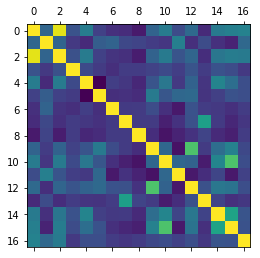

In [447]:
plt.matshow(df_num.corr())
#based on the corr matrix, loan amt and installment are highly correlated, taking installment off

In [448]:
# Create train and test data by 80- 20 split for a specific loan purpose ie credit card

In [449]:
df_cc = df_clean[df_clean['purpose']=='credit_card']
#print(df_cc.head())
modelling_df = df_cc[['loan_amnt', 'int_rate', 'grade','emp_length', 'home_ownership', 'annual_inc',
                        'dti','inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
                          'revol_bal', 'revol_util', 'total_acc','mths_since_last_major_derog', 'tot_cur_bal', 'total_rev_hi_lim', 
                          'ver_stat','loan_class']]
print(modelling_df.shape)
print(modelling_df.describe)
#221810 rows x 20 columns (including the target variable)
print(modelling_df.head())

(44123, 19)
<bound method NDFrame.describe of         loan_amnt  int_rate  grade  emp_length  home_ownership  annual_inc  \
0          5000.0     10.65      2        10.0               2     24000.0   
13         3000.0      9.91      2         3.0               2     15000.0   
22        10000.0     11.71      2        10.0               3     50000.0   
25        15000.0      9.91      2         2.0               1     92000.0   
29         8500.0     11.71      2         0.9               2     25000.0   
34         7000.0     15.96      3         7.0               2     34000.0   
35        12400.0     10.65      2        10.0               2     41000.0   
48        10000.0      6.03      1        10.0               2     60000.0   
51        25600.0      9.91      2         9.0               2    110000.0   
54        12000.0      9.91      2         1.0               2     46000.0   
56        16000.0     19.91      5         7.0               2     81000.0   
58        10000.0 

# Modelling

In [450]:
df_clean.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [451]:


train_dat=modelling_df.sample(frac=0.8,random_state=99)
test_dat=modelling_df.drop(train_dat.index)
print(train_dat.shape)
print(test_dat.shape)
print(train_dat.loan_class.value_counts())
print(test_dat.loan_class.value_counts())


# Overall, the value "Bad" in the target dataset make up only 20% of the population. 
# This split ensures that both the train and test datasets have almost 20% of the "Bad" population making it an even split

(35298, 19)
(8825, 19)
Good    28527
Bad      6771
Name: loan_class, dtype: int64
Good    7078
Bad     1747
Name: loan_class, dtype: int64


In [452]:
train_variables=train_dat.drop('loan_class',axis=1)
print(train_variables.shape)
train_target=train_dat['loan_class']
type(train_target)

test_variables=test_dat.drop('loan_class',axis=1)
print(test_variables.shape)
test_target=test_dat['loan_class']
type(test_target)


(35298, 18)
(8825, 18)


pandas.core.series.Series

# Decision Tree Classifier

In [453]:
model=tree.DecisionTreeClassifier()
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [454]:
model.fit(train_variables,train_target)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [455]:
print(model.feature_importances_)

[0.07994415 0.0749136  0.05067742 0.04280271 0.01361648 0.08231037
 0.10346073 0.02515032 0.03636871 0.01813279 0.05373644 0.08257158
 0.09217917 0.0623045  0.01839984 0.08776609 0.0665655  0.0090996 ]


In [456]:
dec_tree=model.predict(test_variables)
print(accuracy_score(test_target,dec_tree))
print(precision_score(test_target,dec_tree, average="macro"))
print(recall_score(test_target,dec_tree, average="macro"))

0.7010764872521247
0.5451552795031056
0.5485048198720512


# Random Forest

In [457]:
rf_model = RandomForestClassifier(n_jobs=2, random_state=99,n_estimators=1000)
rf_model.fit(train_variables,train_target)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=False, random_state=99, verbose=0, warm_start=False)

In [458]:
print(rf_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=False, random_state=99, verbose=0, warm_start=False)


In [459]:
rf_pred=rf_model.predict(test_variables)

In [460]:
print(accuracy_score(test_target,rf_pred))
print(precision_score(test_target,rf_pred, average="macro"))
print(recall_score(test_target,rf_pred, average="macro"))

0.8041926345609065
0.6814961951948656
0.52246740992066


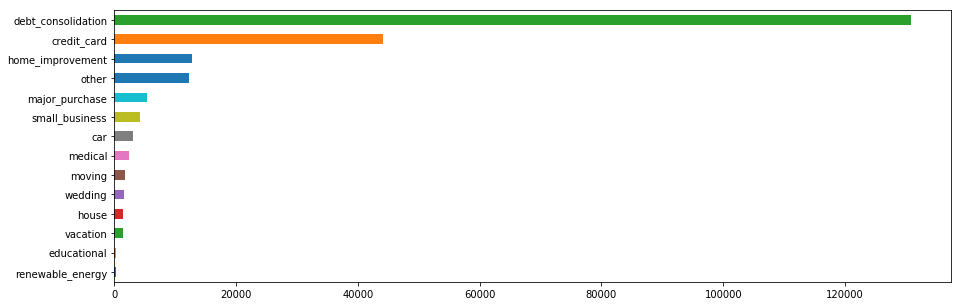

In [461]:
df_loan_2010_clean['purpose'].value_counts().sort_values().plot(kind='barh',figsize=(15,5))

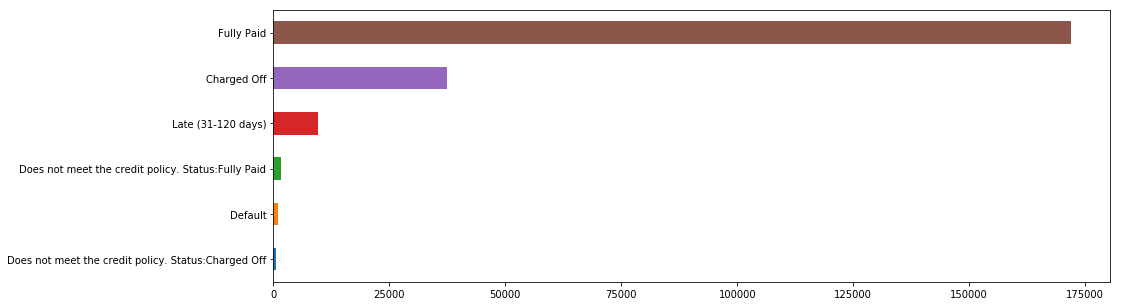

In [462]:
df_loan_2010_clean['loan_status'].value_counts().sort_values().plot(kind='barh',figsize=(15,5))

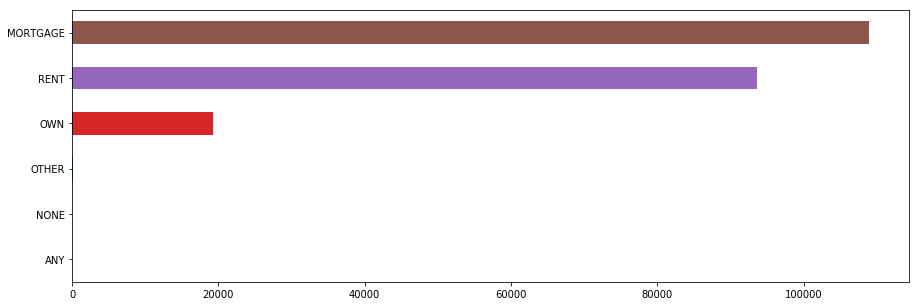

In [463]:
df_loan_2010_clean['home_ownership'].value_counts().sort_values().plot(kind='barh',figsize=(15,5))

In [464]:
rf_model.feature_importances_

array([0.07599452, 0.08769795, 0.03596246, 0.04568443, 0.01678333,
       0.08432055, 0.09536863, 0.02663842, 0.03924842, 0.01778069,
       0.05595478, 0.08418459, 0.085826  , 0.06816236, 0.02065238,
       0.07782419, 0.07189536, 0.01002095])

In [465]:
rf_model.fit

<bound method BaseForest.fit of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=False, random_state=99, verbose=0, warm_start=False)>